In [1]:
%matplotlib inline

In [2]:
from pandas import *

In [3]:
from numpy import *

In [4]:
from matplotlib.pyplot import *

In [5]:
names = read_csv('data/baby-names2.csv')
births = read_csv('data/births.csv')

In [6]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [7]:
births.head()

,year,sex,births
0,1880,boy,118405
1,1881,boy,108290
2,1882,boy,122034
3,1883,boy,112487
4,1884,boy,122745


In [9]:
merged_df = merge(names, births, on=['year', 'sex'])
merged_df.head()

,year,name,prop,sex,soundex,births
0,1880,John,0.081541,boy,J500,118405
1,1880,William,0.080511,boy,W450,118405
2,1880,James,0.050057,boy,J520,118405
3,1880,Charles,0.045167,boy,C642,118405
4,1880,George,0.043292,boy,G620,118405


In [10]:
merged_df['persons'] = floor(merged_df.prop*merged_df.births)
merged_df.head()

,year,name,prop,sex,soundex,births,persons
0,1880,John,0.081541,boy,J500,118405,9654
1,1880,William,0.080511,boy,W450,118405,9532
2,1880,James,0.050057,boy,J520,118405,5926
3,1880,Charles,0.045167,boy,C642,118405,5347
4,1880,George,0.043292,boy,G620,118405,5125


In [11]:
boys = merged_df[merged_df.sex == 'boy']
girls = merged_df[merged_df.sex == 'girl']

In [18]:
idf_boys = boys.set_index(['name','year'])
idf_girls = girls.set_index(['name', 'year'])

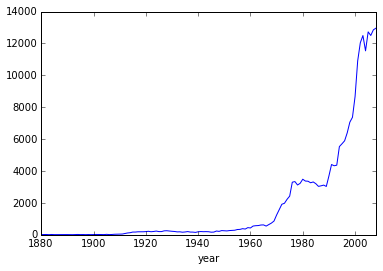

In [21]:
idf_boys.ix['Gabriel'].persons.plot()

In [14]:
boys_p = idf_boys.persons
boys_p.head()

year  name   
1880  John       9654
      William    9532
      James      5926
      Charles    5347
      George     5125
Name: persons, dtype: float64

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


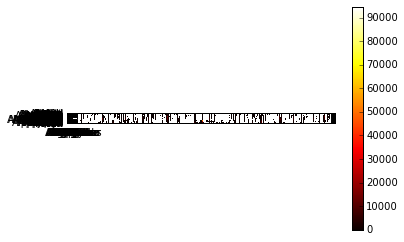

In [483]:
plt.imshow(grid, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(grid)), grid.columns)
plt.yticks(range(len(grid)), grid.columns);

In [422]:
boys_df = boys[(boys.year >= 2001)]

In [413]:
top5boys = boys_df.groupby(['year']).head(5)
top5boys

,year,name,prop,sex,soundex,births,persons
121000,2001,Jacob,0.015734,boy,J210,2065725,32502
121001,2001,Michael,0.014357,boy,M240,2065725,29657
121002,2001,Matthew,0.012965,boy,M300,2065725,26782
121003,2001,Joshua,0.012582,boy,J200,2065725,25990
121004,2001,Christopher,0.011233,boy,C623,2065725,23204
122000,2002,Jacob,0.014792,boy,J210,2063688,30526
122001,2002,Michael,0.013669,boy,M240,2063688,28208
122002,2002,Joshua,0.012581,boy,J200,2063688,25963
122003,2002,Matthew,0.012180,boy,M300,2063688,25135
122004,2002,Ethan,0.010709,boy,E350,2063688,22100


In [397]:
top_boys = boys_df.groupby('year')['persons'].sum().sort_values(ascending=False)[:10]
top_boys

year
2007    1767743
2006    1762505
2003    1728754
2005    1726230
2008    1725343
2004    1723370
2001    1712560
2002    1705262
Name: persons, dtype: float64

In [380]:
def sorted(group, num=3):
    tmp = group.sort_values(ascending=False)[:num]
    tmp.index = range(num)
    return tmp

In [387]:
boys_idf.head(2)

,name,prop,sex,soundex,births,persons
year,,,,,,
2001,Jacob,0.015734,boy,J210,2065725,32502
2001,Michael,0.014357,boy,M240,2065725,29657


In [390]:
boys_idf['persons'].apply(sorted)

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

In [227]:
idf = boys.set_index(['name', 'year'])
idf.head()

,,prop,sex,soundex,births,persons
name,year,,,,,
Jacob,2001,0.015734,boy,J210,2065725,32502
Michael,2001,0.014357,boy,M240,2065725,29657
Matthew,2001,0.012965,boy,M300,2065725,26782
Joshua,2001,0.012582,boy,J200,2065725,25990
Christopher,2001,0.011233,boy,C623,2065725,23204


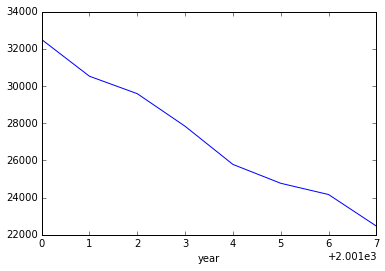

In [228]:
idf.ix['Jaco'].persons.plot()

In [392]:
top_boys = boys.groupby('name')['persons'].sum().sort_values(ascending=False)[:10]
top_girls = girls.groupby('name')['persons'].sum().sort_values(ascending=False)[:10]

In [393]:
top_boys

name
James      5021269
John       5016124
Robert     4752198
Michael    4207352
William    3951365
David      3495940
Richard    2535681
Joseph     2490274
Charles    2320818
Thomas     2239606
Name: persons, dtype: float64

In [231]:
top_girls

name
Emily        182118
Madison      157737
Emma         150553
Olivia       125486
Hannah       124753
Abigail      123209
Isabella     120714
Samantha     107180
Ashley       107090
Elizabeth    106905
Name: persons, dtype: float64

In [125]:
def get_max_record(group):
    return group.ix[group.prop.idxmax()]

result = boys.groupby('year').apply(get_max_record)

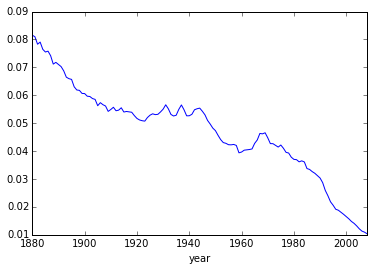

In [126]:
result.prop.plot()

In [129]:
idf.ix['John', 1880]

prop       0.081541
sex             boy
soundex        J500
Name: (John, 1880), dtype: object

In [130]:
boys.groupby('name')['prop'].mean().sort_values()

name
Kennard        0.000027
Danniel        0.000027
Deryl          0.000028
Grayling       0.000028
Michial        0.000028
Cheryl         0.000028
Dwyane         0.000028
Levern         0.000029
Theodis        0.000029
Randolf        0.000029
Diane          0.000029
Renard         0.000029
Kimball        0.000029
Patric         0.000029
Lex            0.000030
Dann           0.000030
Erasmo         0.000030
Darryll        0.000030
Garey          0.000030
Rudolfo        0.000030
Michal         0.000031
Lyn            0.000031
Brenda         0.000031
Mikeal         0.000031
Desi           0.000031
Kem            0.000031
Kathleen       0.000031
Terance        0.000031
Cynthia        0.000031
Linden         0.000031
                 ...   
Arthur         0.005845
Brandon        0.005951
Andrew         0.006088
Harry          0.006162
Matthew        0.006178
Anthony        0.006315
Kenneth        0.006470
Kevin          0.006589
Ryan           0.006682
Jeffrey        0.006701
Walter     

In [131]:
boys['prop'].describe()

count    129000.000000
mean          0.000916
std           0.003441
min           0.000026
25%           0.000071
50%           0.000142
75%           0.000453
max           0.081541
Name: prop, dtype: float64

In [132]:
def get_quantile_count(group, quantile=.5):
#     group = group.groupby('soundex').sum()
    df = group.sort_values(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)
    
boy_ct = boys.groupby('year').apply(get_quantile_count)
girl_ct = girls.groupby('year').apply(get_quantile_count)

In [133]:
boy_ct

year
1880     [15]
1881     [15]
1882     [17]
1883     [17]
1884     [19]
1885     [20]
1886     [20]
1887     [21]
1888     [22]
1889     [22]
1890     [23]
1891     [24]
1892     [25]
1893     [25]
1894     [27]
1895     [27]
1896     [28]
1897     [28]
1898     [28]
1899     [30]
1900     [30]
1901     [31]
1902     [31]
1903     [32]
1904     [33]
1905     [34]
1906     [34]
1907     [35]
1908     [35]
1909     [36]
        ...  
1979     [37]
1980     [38]
1981     [37]
1982     [37]
1983     [36]
1984     [37]
1985     [38]
1986     [40]
1987     [42]
1988     [43]
1989     [47]
1990     [50]
1991     [53]
1992     [56]
1993     [61]
1994     [65]
1995     [69]
1996     [73]
1997     [77]
1998     [80]
1999     [83]
2000     [89]
2001     [94]
2002     [96]
2003    [100]
2004    [105]
2005    [110]
2006    [115]
2007    [120]
2008    [127]
dtype: object

In [101]:
boy_ct.plot(label='boy')
girl_ct.plot(label='girl')
legend()

TypeError: Empty 'DataFrame': no numeric data to plot

In [135]:
boys[boys.year == 2008].prop.rank()

128000    1000.0
128001     999.0
128002     998.0
128003     997.0
128004     996.0
128005     995.0
128006     994.0
128007     993.0
128008     992.0
128009     991.0
128010     990.0
128011     989.0
128012     988.0
128013     987.0
128014     986.0
128015     985.0
128016     984.0
128017     983.0
128018     982.0
128019     981.0
128020     980.0
128021     979.0
128022     978.0
128023     977.0
128024     976.0
128025     975.0
128026     974.0
128027     973.0
128028     972.0
128029     971.0
           ...  
128970      28.0
128971      28.0
128972      28.0
128973      28.0
128974      28.0
128975      28.0
128976      28.0
128977      20.5
128978      20.5
128979      20.5
128980      20.5
128981      20.5
128982      20.5
128983      16.0
128984      16.0
128985      16.0
128986      12.5
128987      12.5
128988      12.5
128989      12.5
128990       7.5
128991       7.5
128992       7.5
128993       7.5
128994       7.5
128995       7.5
128996       2.5
128997       2

In [136]:
grouped = boys.groupby('year').prop

In [139]:
boys['year_rank'] = grouped.transform(Series.rank)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


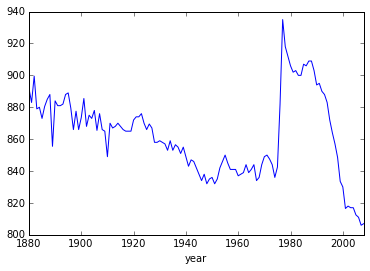

In [142]:
idf = boys.set_index(['name', 'year'])
idf.ix['Wesley'].year_rank.plot()

In [473]:
type(boy_p)

pandas.core.series.Series

In [452]:
grid = boy_p.unstack('name')
grid

name,Aaden,Aarav,Aaron,Ab,Abb,Abbie,Abbott,Abdiel,Abdul,Abdullah,...,Zeb,Zebulon,Zechariah,Zed,Zeke,Zenas,Zeno,Zigmund,Zion,Zollie
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,101,4,NaN,NaN,4,NaN,NaN,NaN,...,9,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,93,4,NaN,NaN,NaN,NaN,NaN,NaN,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,85,5,NaN,NaN,NaN,NaN,NaN,NaN,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13,NaN,NaN,NaN,5,NaN,5,NaN,NaN,NaN
1884,NaN,NaN,96,NaN,5,NaN,NaN,NaN,NaN,NaN,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1885,NaN,NaN,88,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,6
1886,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1887,NaN,NaN,78,5,NaN,5,NaN,NaN,NaN,NaN,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,90,NaN,NaN,NaN,5,NaN,NaN,NaN,...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
